<a href="https://colab.research.google.com/github/klhftco/datagood-ADIHP/blob/main/Data%20Visualizations%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Visualizations (written by Neha Hudait) 
This week, we will focus primarily on how to visualize the data we are working with. We will work with a dataset that deals with household incomes and understand how to analyze it from a visual perspective.

As always, we will first import some necessary modules and import the dataset.

https://forms.gle/tay3dbw85P28Sksu5 <- Submission link for ADIHP

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing the data
df = pd.read_csv('https://raw.githubusercontent.com/shoehair/beginner-track/main/unemployment.csv')
#'/content/drive/Shared with me/DataGood @ Berkeley/Spring2021/Beginner Track/unemployment.csv'
#reviewing from last week: renaming columns
df = df.rename(columns={"POVALL_2016": "Total_Estimate", "CI90LBAll_2016": "90_Upper", "CI90UBALL_2016": "90_Lower"})
df.head()

#reviewing from last week: removing dollar signs 
def remove_non_numbers(x): 
  # check if input is valid  
  if not x:
    return 0
  # since we know the first element is always a "$", we can simply slice the string and return the result casted into an integer 
  no_dollar_sign = int(x[1:].replace(",", ""))
  return no_dollar_sign

df["Median_Household_Income_2016"] = df["Median_Household_Income_2016"].apply(remove_non_numbers)

Let's compare the unemployment rate and median household income and see if there is an association in California. Let's first load the dataframe for California.

In [ ]:
is_ca = df["State"] == "CA"
df_ca =  df[is_ca]
df_ca.head()

,FIPStxt,State,Area_name,Metro_2013,Civilian_labor_force_2016,Employed_2016,Unemployed_2016,Unemployment_rate_2016,Median_Household_Income_2016,Total_Estimate,90_Upper,90_Lower
186,6001,CA,"Alameda County, CA",1,"837,583","801,774","35,809",4.3,89472,"173,386","162,673","184,099"
187,6003,CA,"Alpine County, CA",0,557,521,36,6.5,57481,199,156,242
188,6005,CA,"Amador County, CA",0,"14,574","13,706",868,6.0,59789,"3,846","3,021","4,671"
189,6007,CA,"Butte County, CA",1,"101,987","95,246","6,741",6.6,45097,"43,428","38,902","47,954"
190,6009,CA,"Calaveras County, CA",0,"20,868","19,684","1,184",5.7,57990,"5,833","4,638","7,028"


Text(0.5, 1.0, 'California Income vs. Unemployment in 2016')

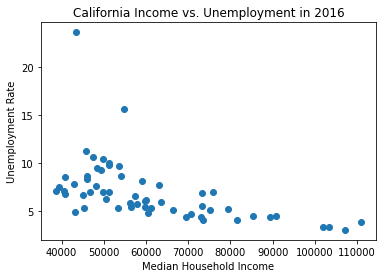

In [ ]:
plt.scatter(df_ca["Median_Household_Income_2016"], df_ca["Unemployment_rate_2016"])
plt.xlabel("Median Household Income")
plt.ylabel("Unemployment Rate")
plt.title("California Income vs. Unemployment in 2016")

**Mini-task 1** Create a scatter plot of income rate vs. unemployment for New York.

Let's now plot this just to see what the relationship is throughout the entire United States as opposed to just California using the groupby method.

In [ ]:
# group by the state
grouped_by_state = df[["State",
                       "Median_Household_Income_2016", 
                       "Unemployment_rate_2016"]].groupby("State").agg(np.mean)
grouped_by_state

,Median_Household_Income_2016,Unemployment_rate_2016
State,,
AK,62153.137931,9.448276
AL,40636.447761,6.700000
AR,39233.720000,4.606667
AZ,45738.200000,7.653333
CA,60930.103448,6.929310
CO,54557.312500,3.345312
CT,74289.500000,5.025000
DC,74093.000000,6.100000
DE,59286.000000,4.600000


Text(0.5, 1.0, 'United States Income vs. Unemployment in 2016')

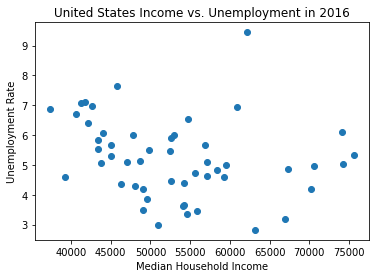

In [ ]:
plt.scatter(grouped_by_state["Median_Household_Income_2016"], 
                       grouped_by_state["Unemployment_rate_2016"])
plt.xlabel("Median Household Income")
plt.ylabel("Unemployment Rate")
plt.title("United States Income vs. Unemployment in 2016")

The median household income seems somewhat correlated, but not as direct as California.

**Discussion:**  what factors do you think could contribute to this relationship? 

Let's individually look at the highest median household incomes





In [ ]:
highest_income = grouped_by_state.sort_values(by="Median_Household_Income_2016", ascending=False).head(10)
highest_income

NameError: ignored

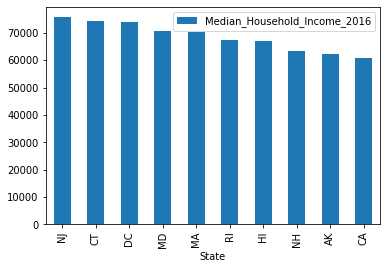

In [ ]:
highest_income.plot.bar(y="Median_Household_Income_2016")

Now, let's look at the top 10 lowest unemployment rates and see if it matches up.

In [ ]:
lowest_unemployment = grouped_by_state.sort_values(by="Unemployment_rate_2016").head(10)
lowest_unemployment

,Median_Household_Income_2016,Unemployment_rate_2016
State,,
NH,63218.400000,2.820000
NE,50985.225806,3.000000
HI,66889.750000,3.200000
CO,54557.312500,3.345312
ND,55908.433962,3.462264
SD,49095.121212,3.471212
IA,54108.747475,3.609091
VT,54234.785714,3.650000
KS,49625.485714,3.841905


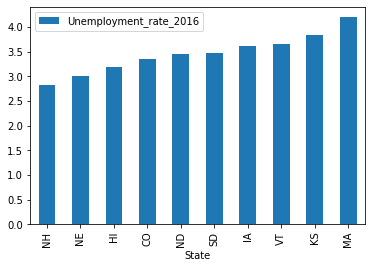

In [ ]:
lowest_unemployment.plot.bar(y="Unemployment_rate_2016")

**Mini-task #2** Let's look at NJ since it has the highest median household income and create a bar chart of the top 10 counties with the highest unemployment rates!

**Discusssion:** what conclusions could we come up with from this data?

##Other Types of Visualizations Using Matplotlib (written by Gloria Zhang and Isabella Borkovic)

Besides looking at scatter plots and bar charts, we will also introduce several other plots that will be helpful depending on what type of data you are analyzing. Let's look at it more generally. 

Line Plot

For this example, we'll be using a very simple data set just to show you the syntax since the original dataset does not have any factors that can be best compared linearly (as opposed to bar chart or scatter plots). There are additional optional parameters which can be found [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot).

In [ ]:
#This is the simple dataset we will work with. 
dict_line = {
    'Weeks': [1,3,5,7], 
    'Money Earned': [100,225,330,600]
}
df_line = pd.DataFrame(dict_line)
df_line

,Weeks,Money Earned
0,1,100
1,3,225
2,5,330
3,7,600


Text(0.5, 1.0, 'Money Earned over 7 Weeks')

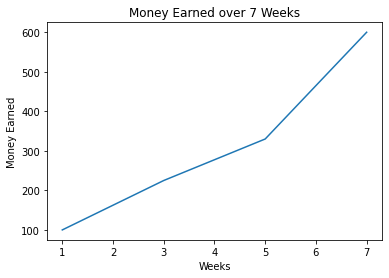

In [ ]:
#Here is its linear representation. 
plt.plot(df_line['Weeks'],df_line['Money Earned'])
plt.xlabel("Weeks")
plt.ylabel("Money Earned")
plt.title("Money Earned over 7 Weeks")

Histogram

Below is the most simplified use of plt.hist but there are also additional parameters you can input such as bins (width of the bins), range, density as a boolean(so that the area under the curve is 1), weights (instead of 1), etc. Documentation can be found [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist) 

(array([1.580e+02, 1.037e+03, 1.202e+03, 4.780e+02, 1.490e+02, 7.100e+01,
        2.800e+01, 1.100e+01, 6.000e+00, 1.000e+00]),
 array([ 22045. ,  33301.4,  44557.8,  55814.2,  67070.6,  78327. ,
         89583.4, 100839.8, 112096.2, 123352.6, 134609. ]),
 <a list of 10 Patch objects>)

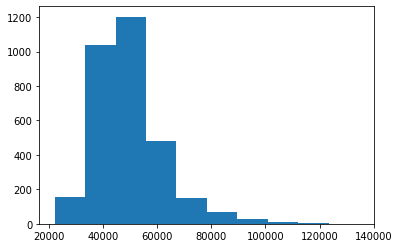

In [ ]:
#For this histogram, we'll plot the median household income in 2016. 
plt.hist(df['Median_Household_Income_2016'])

Pie Charts

Once again, there are additional optional parameters such as setting the color, the radius, whether the data is displayed clockwise or counterclockwise, whether to normalize the data so the sum is 1, etc. The documentation can be found [here](https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie).

([<matplotlib.patches.Wedge at 0x7f22a3e11690>,
 [Text(0.4993895680663529, 0.9801071672559597, 'CO'),
  Text(-1.046162158377023, 0.3399187231970734, 'NE'),
  Text(-0.7778174593052025, -0.7778174593052023, 'ND'),
  Text(2.5747357732524542e-08, -1.0999999999999999, 'TX'),
  Text(0.4993895795368844, -0.9801071614114316, 'MT'),
  Text(0.7778174866143991, -0.7778174319960045, 'IA'),
  Text(0.9801071964785992, -0.4993895107136921, 'KS'),
  Text(1.0864571823074214, -0.17207786322655924, 'SD')])

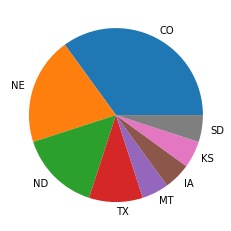

In [ ]:
#We will use a pie chart to visualize the makeup of different states in the counties with the 20 lowest unemployment rates.
lowest_unemployment_20 = df.sort_values(by="Unemployment_rate_2016").head(20)
consolidated = lowest_unemployment_20['State'].value_counts()
plt.pie(consolidated,labels=consolidated.index.tolist()) #input for labels is a list of states

Here is a [link](https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/) to other plotting options as well as a broad [list](https://matplotlib.org/3.3.3/tutorials/introductory/sample_plots.html) from matplotlib.org for further exploration.

##Task
Notebook Task: Given the dataset of income, unemployment, and labor force statistics, what are some other patterns between states, counties, unemployment rate, median income, and more? Analyze this data visually and come up with more conclusions/interesting observations. 


##Project Task (created by Jon Sulit and Stanley Kwon)

For the last two weeks, we explored Python and its various libraries for analyzing data. This week, we want you to spend some time analyzing our healthcare providers dataset using what you learned! Try manipulating the dataset and create **TWO** visualizations that tell us something interesting about the data (some ideas are graphing the average medicare payment amount by number of services or by gender). To make sure that you can read in the dataset on your end, you might have to download it and drop it in the files tab on the left.

In [ ]:
df = pd.read_csv("Healthcare Providers.csv")
df

NameError: ignored